In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

# 1. Define the subgraph's state
class SubgraphState(TypedDict):
    query: str
    search_results: str

# 2. Define the subgraph's nodes
def search_node(state: SubgraphState):
    # ... logic to perform a search and return results
    return {"search_results": "found a bunch of stuff"}

# 3. Build and compile the subgraph
subgraph_builder = StateGraph(SubgraphState)
subgraph_builder.add_node("search_tool", search_node)
subgraph_builder.set_entry_point("search_tool")
subgraph_builder.set_finish_point("search_tool")
search_subgraph = subgraph_builder.compile()


In [2]:
# 4. Define the parent graph's state (must be compatible)
class ParentGraphState(TypedDict):
    query: str
    search_results: str
    answer: str

# 5. Define the parent graph's other nodes
def final_answer_node(state: ParentGraphState):
    # ... logic to formulate the final answer based on the search results
    return {"answer": f"The answer, based on the search results: {state['search_results']}"}

# 6. Build the parent graph
parent_builder = StateGraph(ParentGraphState)
parent_builder.add_node("subgraph_node", search_subgraph)  # Add the compiled subgraph as a node
parent_builder.add_node("final_answer", final_answer_node)

# 7. Add edges
parent_builder.set_entry_point("subgraph_node")
parent_builder.add_edge("subgraph_node", "final_answer")
parent_builder.set_finish_point("final_answer")
parent_graph = parent_builder.compile()


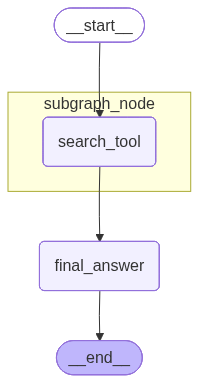

In [3]:
from IPython.display import Image, display 

display(Image(parent_graph.get_graph(xray=True).draw_mermaid_png()))